In [1]:
import numpy as np

import pyiron_workflow as pwf

In [2]:
@pwf.as_function_node
def linspace(x_min: int = 0, x_max: float = 2 * np.pi, n: int = 50):

    vec = np.linspace(x_min, x_max, n)
    return vec


@pwf.as_function_node
def sin(x):
    import numpy as np

    vec = np.sin(x)
    return vec


@pwf.as_function_node("plot")
def plot(x, y):
    import matplotlib.pylab as plt

    plt.plot(x, y)
    return plt.show()

In [3]:
wf = pwf.Workflow("my_first_workflow")

wf.x = linspace(x_min=-2)
wf.sin = sin(x=wf.x)
wf.plot = plot(x=wf.x, y=wf.sin.outputs.vec)

In [4]:
wf

pyiron_workflow instance: 
from pyiron_workflow import Workflow
import pyiron_nodes

wf = Workflow("my_first_workflow")

wf.x = __main__.linspace(x_min=-2)
wf.sin = __main__.sin(x=wf.x)
wf.plot = __main__.plot(x=wf.x, y=wf.sin)

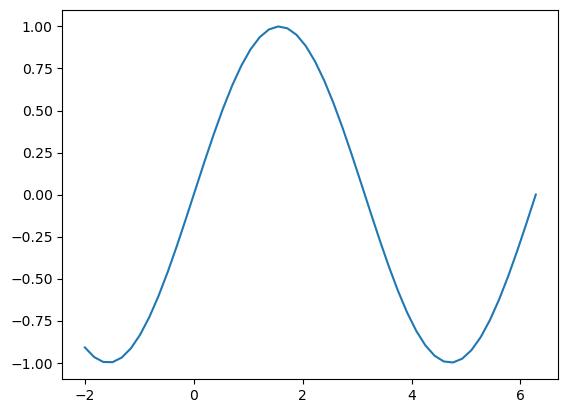

In [5]:
wf.run()

In [6]:
from pyiron_workflow.graph.gui import PyironFlow

In [7]:
widget = PyironFlow([wf])
widget.gui

In the GUI, we can transition from a `Node`/`Workflow` representation to a `Graph` representation.
The GUI lets us group nodes together, and pull on individual nodes.
We can duplicate this at the code level as follows:

In [ ]:
import pyiron_nodes as pn
import pyiron_workflow as pwf
from pyiron_workflow.api import graph as base

wf = pwf.Workflow("group_returns")
wf.m = pn.math.Linspace(0,1,2)
g = base.get_full_graph_from_wf(wf)
g = base.create_group(g, [0], label="subgraph")
base.pull_node(g, "subgraph")